In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
filename = 'NSEI'
df = pd.read_csv(filename + '.csv')

In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(['Date'])

In [4]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0.0
1,2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0.0
2,2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0.0
3,2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0.0
4,2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0.0


In [5]:
df = df[(df['Date'].dt.dayofweek !=5) &(df['Date'].dt.dayofweek) !=6]

In [6]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0.0
1,2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0.0
2,2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0.0
3,2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0.0
4,2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0.0


In [7]:
df = df.dropna(axis=0, how='all', subset=df.columns[1:])

In [8]:
df = df.sort_values(['Date'])

In [9]:
import matplotlib.pyplot as plt

In [10]:
#need to check the stationary of the dtaa if not stationary the need to use the return persentage for the analysis


from statsmodels.tsa.stattools import adfuller

def test_stationarity(df, ts):
    """
    Test stationarity using moving average statistics and Dickey-Fuller test
    Source: https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/
    """
    
    # Determing rolling statistics
    rolmean = df[ts].rolling(window = 12, center = False).mean()
    rolstd = df[ts].rolling(window = 12, center = False).std()
    
    # Plot rolling statistics:
    orig = plt.plot(df[ts], 
                    color = 'blue', 
                    label = 'Original')
    mean = plt.plot(rolmean, 
                    color = 'red', 
                    label = 'Rolling Mean')
    std = plt.plot(rolstd, 
                   color = 'black', 
                   label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation for %s' %(ts))
    plt.xticks(rotation = 45)
    plt.show(block = False)
    plt.close()
    
    # Perform Dickey-Fuller test:
    # Null Hypothesis (H_0): time series is not stationary
    # Alternate Hypothesis (H_1): time series is stationary
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(df[ts], 
                      autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], 
                         index = ['Test Statistic',
                                  'p-value',
                                  '# Lags Used',
                                  'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

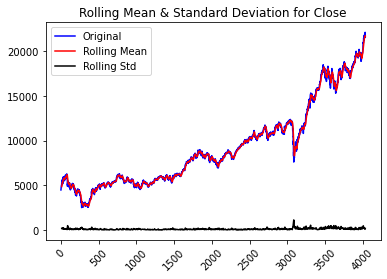

Results of Dickey-Fuller Test:
Test Statistic                    1.172664
p-value                           0.995791
# Lags Used                      12.000000
Number of Observations Used    3991.000000
Critical Value (1%)              -3.431990
Critical Value (5%)              -2.862264
Critical Value (10%)             -2.567156
dtype: float64


In [11]:
test_stationarity(df, "Close")

In [12]:
df['Day_Return'] = ((df['Close'] - df['Close'].shift(1))/df['Close'].shift(1))*100
df['50_Day_Return'] = ((df['Close'] - df['Close'].shift(50))/df['Close'].shift(50))*100

In [13]:
df2 = df.dropna(subset=['50_Day_Return'])
df2.head(10)


,Date,Open,High,Low,Close,Adj Close,Volume,Day_Return,50_Day_Return
50,2007-11-28,5699.549805,5749.950195,5595.500000,5617.549805,5617.549805,0.0,-1.414496,24.983034
51,2007-11-29,5617.799805,5725.000000,5612.100098,5634.600098,5634.600098,0.0,0.303518,23.940871
52,2007-11-30,5633.899902,5782.549805,5632.649902,5762.750000,5762.750000,0.0,2.274339,21.773535
53,2007-12-03,5765.450195,5878.799805,5754.600098,5865.000000,5865.000000,0.0,1.774326,23.537409
54,2007-12-04,5870.200195,5897.250000,5840.299805,5858.350098,5858.350098,0.0,-0.113383,21.101598
55,2007-12-05,5861.899902,5949.299805,5859.950195,5940.000000,5940.000000,0.0,1.393735,20.433068
56,2007-12-06,5941.049805,6027.049805,5919.799805,5954.700195,5954.700195,0.0,0.247478,20.568555
57,2007-12-07,5963.600098,6042.100098,5894.799805,5974.299805,5974.299805,0.0,0.329145,20.925004
58,2007-12-10,5974.000000,6015.299805,5923.350098,5960.600098,5960.600098,0.0,-0.229311,19.198895
59,2007-12-11,5960.399902,6111.200195,5960.399902,6097.250000,6097.250000,0.0,2.292553,21.426506


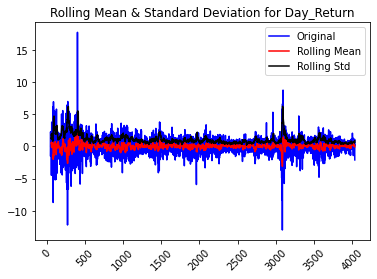

Results of Dickey-Fuller Test:
Test Statistic                -1.376444e+01
p-value                        9.945425e-26
# Lags Used                    1.600000e+01
Number of Observations Used    3.937000e+03
Critical Value (1%)           -3.432012e+00
Critical Value (5%)           -2.862274e+00
Critical Value (10%)          -2.567161e+00
dtype: float64


In [14]:
test_stationarity(df2, "Day_Return")

In [18]:
final_cols =  ["Open", "High", "Low", "Close", "Day_Return", "50_Day_Return"]
df3 = df2[final_cols]

In [19]:
test_per= 0.1
test_ob = int(np.round(test_per * len(df3)))

traing_data = df3[: -test_ob]
testing_data = df3[-test_ob:]


vald_per = 0.7
val_obs = int(np.round(vald_per* len(testing_data)))

validation_data = testing_data[: -val_obs]
outsample_data = testing_data[-val_obs: ]

In [21]:
from sklearn.preprocessing import StandardScaler

noramlize = StandardScaler()
trainNorm = noramlize.fit_transform(traing_data.values)
validationNorm = noramlize.fit_transform(validation_data.values)
outsNorm = noramlize.fit_transform(outsample_data.values)

In [23]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
tainMx = min_max_scaler.fit_transform(trainNorm)
valMx = min_max_scaler.fit_transform(validationNorm)
outsnMx = min_max_scaler.fit_transform(outsNorm)

In [24]:
taninMx_x, trainMx_y = tainMx[:, :-1], tainMx[:, -1]
valMx_x, valMx_y = valMx[:, :-1], valMx[:, -1]
outsnMx_x, outsnMx_y = outsnMx[:, :-1], outsnMx[:, -1]

In [39]:
data = df3['Day_Return'].values.reshape(-1, 1)

In [40]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [45]:
def create_sequences(data, seq_length):
    sequences = []
    targets = []
    for i in range(len(data)-seq_length):
        seq = data[i:i+seq_length]
        target = data[i+seq_length]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)


In [46]:
sequence_length = 10  # You can adjust this based on your data and problem

# Create sequences and targets
X, y = create_sequences(data_scaled, sequence_length)


In [47]:
train_size = int(len(X) * 0.80)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [48]:
train_size = int(len(X) * 0.80)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape data for LSTM input: (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [62]:
early_stopping = EarlyStopping(monitor='val_loss', patience=9, restore_best_weights=True)

In [68]:
model = Sequential()

# CNN layers to capture spatial patterns
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(sequence_length, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())

# LSTM layer to capture temporal patterns
model.add(LSTM(units=50, activation='relu'))

# Output layer
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')


ValueError: Input 0 of layer "lstm_10" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 256)

In [59]:
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values to the original scale
y_pred_original = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))


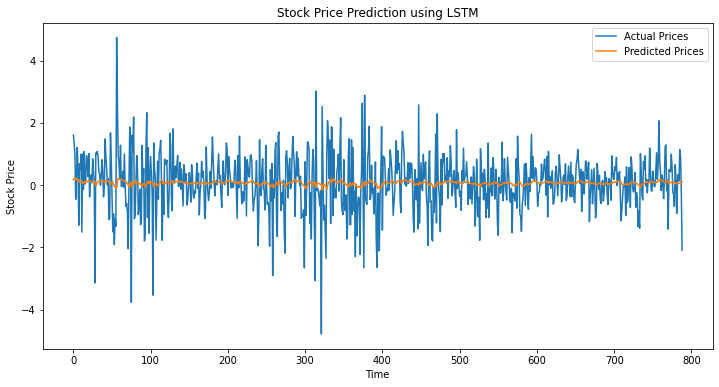

In [60]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label='Actual Prices')
plt.plot(y_pred_original, label='Predicted Prices')
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()